In [ ]:
The data contains some basic details of the customers of a mall, based on the nature of spending customer is given spending score.
Main objective is to understand the customers need and update the same to the sales and marketing team to improvise the sales of the products.

objective:
    
Maximize: Sales of the products
    
Minimize: Customer churn

In [104]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [105]:
df = pd.read_csv('Mall_Customers.csv')

In [106]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [107]:
#Since customerID is a nominal data and doesn't provide any useful information so the feature will be dropped.
df.drop(['CustomerID'], axis =1 , inplace= True)

In [108]:
#Checking for null values
df.isna().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [109]:
#Checking for duplicate values
duplicate = df.duplicated()
sum(duplicate)

0

In [110]:
#There are no duplicate values

In [111]:
#To know the data type of each feature
df.dtypes

Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

<AxesSubplot:xlabel='Age', ylabel='Spending Score (1-100)'>

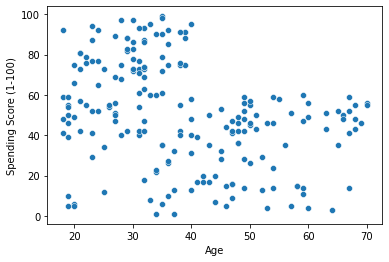

In [112]:
sns.scatterplot(x='Age', y='Spending Score (1-100)', data=df)

In [113]:
#observation
Spending score is high between the age group of 20 to 40

SyntaxError: invalid syntax (1229583320.py, line 2)

<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Annual Income (k$)'>

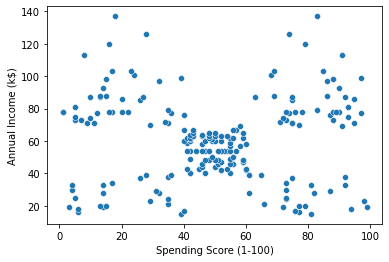

In [114]:
sns.scatterplot(x='Spending Score (1-100)', y='Annual Income (k$)', data=df)

In [115]:
#Obseravation
data can be categorized into 5 clusters based on spending Score and Annual Income

SyntaxError: invalid syntax (1093360390.py, line 2)

In [116]:
df.Gender.value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='Spending Score (1-100)'>

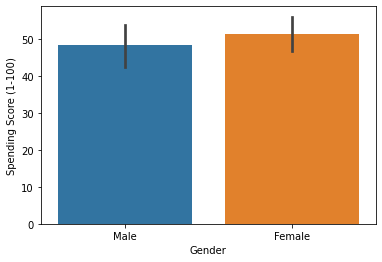

In [117]:
sns.barplot(x='Gender',y='Spending Score (1-100)', data=df)

In [118]:
#Observation
Spending score of women is greater than men


SyntaxError: invalid syntax (1930517745.py, line 2)

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

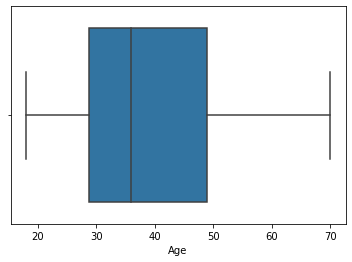

In [119]:
#Checking for ouliers in the data set

sns.boxplot(df.Age)

In [120]:
df.rename(columns={'Spending Score (1-100)':'spending_score'},inplace=True)


In [121]:
df

,Gender,Age,Annual Income (k$),spending_score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='spending_score'>

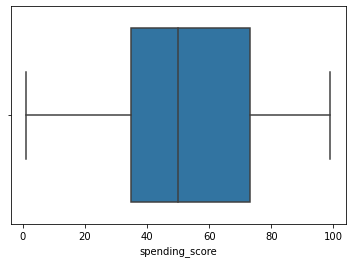

In [122]:
sns.boxplot(df.spending_score)

In [123]:
df.rename(columns={'Annual Income (k$)':'Annual_income'},inplace=True)


C:\Users\Hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Annual_income'>

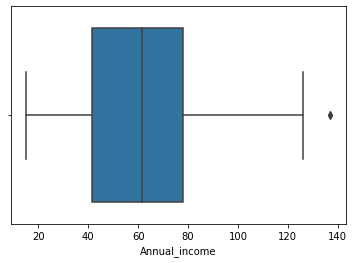

In [124]:
sns.boxplot(df.Annual_income)

In [125]:
Q1 = df['Annual_income'].quantile(0.25)
Q3 = df['Annual_income'].quantile(0.75)
Q1, Q3

(41.5, 78.0)

In [126]:
IQR = Q3-Q1
IQR

36.5

In [127]:
lower_limit =Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(-13.25, 132.75)

In [128]:
outlier = np.where(df['Annual_income']>upper_limit, True,np.where(df['Annual_income']<lower_limit,True,False))
outlier

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [129]:
df_trimmed = df.loc[~(outlier),]
df_trimmed

,Gender,Age,Annual_income,spending_score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
193,Female,38,113,91
194,Female,47,120,16
195,Female,35,120,79
196,Female,45,126,28


In [130]:
#Applying winsorization technique to replace the outliers with upper limit or lower limit values
from feature_engine.outliers import Winsorizer

In [131]:
winsor = Winsorizer(capping_method ='iqr',tail='both',fold=1.5,variables='Annual_income')
df_t = winsor.fit_transform(df[['Annual_income']])
df_t

,Annual_income
0,15.00
1,15.00
2,16.00
3,16.00
4,17.00
...,...
195,120.00
196,126.00
197,126.00
198,132.75


In [132]:
df.drop(['Annual_income'], axis=1, inplace=True)
df['Annual_income'] = df_t

In [133]:
df

,Gender,Age,spending_score,Annual_income
0,Male,19,39,15.00
1,Male,21,81,15.00
2,Female,20,6,16.00
3,Female,23,77,16.00
4,Female,31,40,17.00
...,...,...,...,...
195,Female,35,79,120.00
196,Female,45,28,126.00
197,Male,32,74,126.00
198,Male,32,18,132.75


In [135]:
#standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data = scaler.fit_transform(df.iloc[:,[1,2,3]])

In [136]:
data

array([[-1.42456879, -0.43480148, -1.74542941],
       [-1.28103541,  1.19570407, -1.74542941],
       [-1.3528021 , -1.71591298, -1.70708307],
       [-1.13750203,  1.04041783, -1.70708307],
       [-0.56336851, -0.39597992, -1.66873673],
       [-1.20926872,  1.00159627, -1.66873673],
       [-0.27630176, -1.71591298, -1.6303904 ],
       [-1.13750203,  1.70038436, -1.6303904 ],
       [ 1.80493225, -1.83237767, -1.59204406],
       [-0.6351352 ,  0.84631002, -1.59204406],
       [ 2.02023231, -1.4053405 , -1.59204406],
       [-0.27630176,  1.89449216, -1.59204406],
       [ 1.37433211, -1.36651894, -1.55369772],
       [-1.06573534,  1.04041783, -1.55369772],
       [-0.13276838, -1.44416206, -1.55369772],
       [-1.20926872,  1.11806095, -1.55369772],
       [-0.27630176, -0.59008772, -1.51535138],
       [-1.3528021 ,  0.61338066, -1.51535138],
       [ 0.94373197, -0.82301709, -1.43865871],
       [-0.27630176,  1.8556706 , -1.43865871],
       [-0.27630176, -0.59008772, -1.400

In [137]:
#for creating the dendogram

from scipy.cluster.hierarchy import linkage, dendrogram
# import scipy.cluster.hierarchy as such

In [138]:
z = linkage(data, method = "complete", metric = "euclidean")

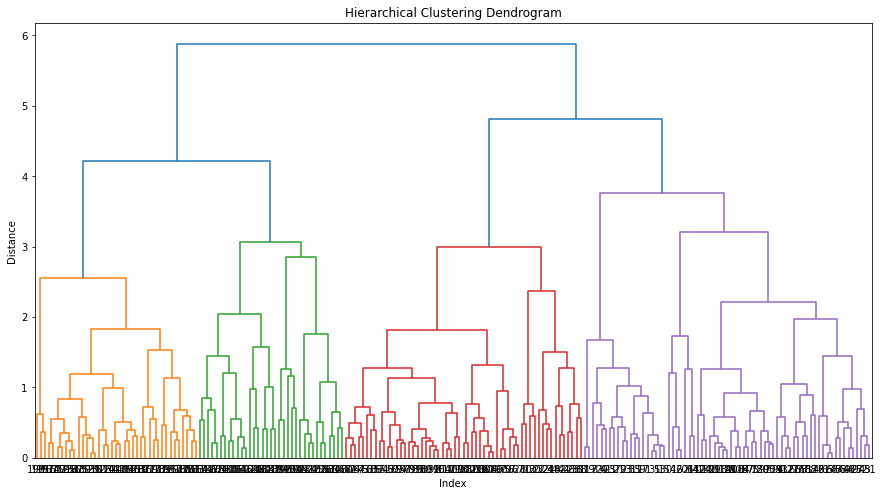

In [139]:
# Dendrogram

plt.figure(figsize=(15, 8));plt.title('Hierarchical Clustering Dendrogram');plt.xlabel('Index');plt.ylabel('Distance')
dendrogram(z, 
    leaf_rotation = 0,  # rotates the x axis labels
    leaf_font_size = 10 # font size for the x axis labels
)
plt.show()

In [140]:
# Now applying AgglomerativeClustering choosing 6 as clusters from the above dendrogram
from sklearn.cluster import AgglomerativeClustering

In [141]:
h_complete = AgglomerativeClustering(n_clusters = 6, linkage = 'complete', affinity = "euclidean").fit(data) 
h_complete.labels_

array([5, 4, 5, 4, 5, 4, 5, 4, 2, 4, 2, 4, 2, 4, 5, 4, 5, 4, 2, 4, 5, 4,
       2, 4, 2, 4, 2, 3, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 3,
       2, 3, 2, 3, 3, 3, 2, 3, 3, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 3,
       3, 2, 3, 3, 2, 2, 2, 2, 2, 3, 3, 3, 3, 2, 2, 3, 2, 2, 3, 2, 2, 3,
       3, 2, 2, 3, 2, 3, 3, 3, 2, 3, 2, 3, 3, 2, 2, 3, 2, 3, 2, 2, 2, 2,
       2, 3, 3, 3, 3, 3, 2, 2, 2, 2, 3, 3, 3, 1, 3, 1, 0, 1, 0, 1, 0, 1,
       3, 1, 0, 1, 0, 1, 0, 1, 0, 1, 3, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1], dtype=int64)

In [142]:
cluster_labels = pd.Series(h_complete.labels_)

In [143]:
df['clust'] = cluster_labels

df

,Gender,Age,spending_score,Annual_income,clust
0,Male,19,39,15.00,5
1,Male,21,81,15.00,4
2,Female,20,6,16.00,5
3,Female,23,77,16.00,4
4,Female,31,40,17.00,5
...,...,...,...,...,...
195,Female,35,79,120.00,1
196,Female,45,28,126.00,0
197,Male,32,74,126.00,1
198,Male,32,18,132.75,0


In [144]:
# Aggregate mean of each cluster
df.groupby(df.clust).mean()
df.groupby(df.clust).std()


,Age,spending_score,Annual_income
clust,,,
0,10.897305,10.211215,16.006580
1,3.728650,9.364489,15.977261
2,8.765463,15.853437,13.576710
3,7.725134,8.063194,10.782293
4,5.029126,9.514532,7.287155
5,7.587584,15.741967,3.147183


In [145]:
#Cross validating with K means
#K Means clustering
from sklearn.cluster import KMeans

In [146]:
TWSS = []

In [147]:
k = list(range(2,9))

In [148]:
for i in k:
    kmeans = KMeans(n_clusters =i)
    kmeans.fit(data)
    TWSS.append(kmeans.inertia_)

In [149]:
TWSS


[389.38622652676895,
 295.187724720685,
 204.69696344803396,
 167.57686457179992,
 133.07634013140506,
 116.36964666165153,
 104.65700568536181]

Text(0, 0.5, 'total_wss')

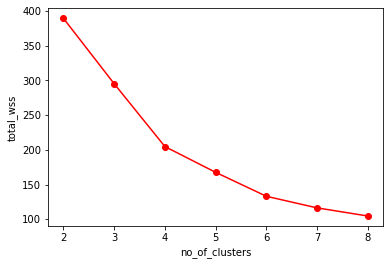

In [150]:
#Scree plot
plt.plot(k, TWSS, 'ro-');plt.xlabel("no_of_clusters");plt.ylabel("total_wss")

In [ ]:
#Conclusion
Based on the Hierarchical and K means clustering making 6 clusters makes sense.
Based on the features like Age, Gender, Spending score and Annual income all the mall customers can  be  clustered into 6 clusters.